In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import Request, urlopen
import requests



In [ ]:
url = "https://www.daftlogic.com/information-appliance-power-consumption.htm"
url

'https://www.daftlogic.com/information-appliance-power-consumption.htm'

In [29]:
#  We will send a GET request to the website to get the data
response = requests.get(url)
content = response.content
#Now we will parse the HTML DATA
#This will be done using beautiful soap
soup = BeautifulSoup(content, 'html.parser')

In [30]:
# This contains the power consuption data
table = soup.find('table')

# Here the data will be stored
data = []

# Extract the data from the table
for row in table.find_all('tr'):
    # Extract the data from each row
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    data.append(row_data)

In [ ]:
# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data)

In [ ]:
# Save all data in csv file
df.to_csv('power.csv', index=False)


In [ ]:
#---------------------------------------------------------Q2--------------------------------------------------------------------------------

In [31]:
import pandas as pd
import seaborn as sns

# Read the data
data = pd.read_csv('Iris.csv')


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# What is the average sepal length of each species of Iris
length=data.groupby('Species')['SepalLengthCm'].mean()
print("Average Sepal Length of each species:")
print(length)

Average Sepal Length of each species:
Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


In [ ]:
# What is the correlation between sepal length and petal length
correlation = data['SepalLengthCm'].corr(data['PetalLengthCm'])
print("\nCorrelation between Sepal Length and Petal Length:")
print(correlation)



Correlation between Sepal Length and Petal Length:
0.8717541573048718


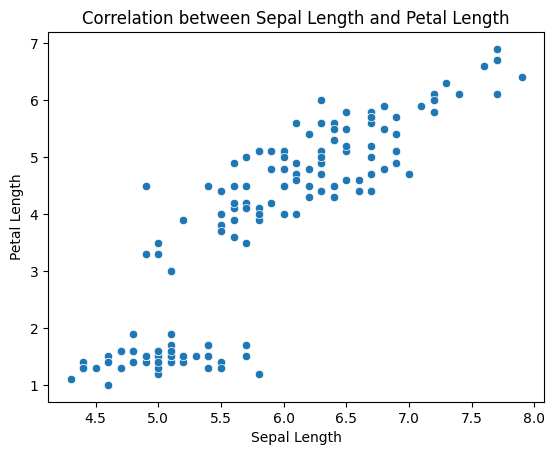

In [33]:
import matplotlib.pyplot as plt
# Plot the correlation between sepal length and petal length
sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm')
plt.title('Correlation between Sepal Length and Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

In [34]:
# Which species of IRIS have the largest petal
largest= data.loc[data['PetalLengthCm'].idxmax(), 'Species']
print("Species of IRIS with the Largest Petal:")
print(largest)


Species of IRIS with the Largest Petal:
Iris-virginica
